In [ ]:

#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.misc import derivative
from scipy.interpolate import lagrange


# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
#a)
def five_point_derivate(f, x, h):
  n = len(x)
  derivada = np.zeros_like(x)

  for i in range(n):
    if i==0:
      derivada[i] = (-25*f(x[i]) + 48*f(x[i]+h)-36*f(x[i]+2*h)+16*f(x[i]+3*h)-3*f(x[i]+4*h))/(12*h)
    elif i==n-1:
      derivada[i] = (25*f(x[i]) - 48*f(x[i]-h)+36*f(x[i]-2*h)-16*f(x[i]-3*h)+3*f(x[i]-4*h))/(12*h)
    else:
      derivada[i] = (f(x[i]-2*h)-8*f(x[i]-h)+8*f(x[i]+h)-f(x[i]+2*h))/(12*h)
  return derivada


#b)
f = lambda x: np.cos(x)
x_ = np.linspace(0, np.pi*2, 10)

#Primera derivada
derivada1 = five_point_derivate(f, x_, 0.5)
polinomio1 = lagrange(x_,derivada1)

#Segunda derivada
derivada2 = five_point_derivate(polinomio1, x_, 0.5)
polinomio2 = lagrange(x_, derivada2)

#Para x = pi/8
valor = polinomio2(np.pi/8)
print(f"El valor de la segunda derivada para x = pi/8 usando derivada de 5 puntos es {valor}")

#c)
valor_real = derivative(f, np.pi/8, dx=1e-6, n=2)
error = np.abs(valor - valor_real)
print(f"El error del cálculo es de {error}")



El valor de la segunda derivada para x = pi/8 usando derivada de 5 puntos es -0.9254725724107434
El error del cálculo es de 0.0016559936201506753


<ipython-input-2-e4f83e9fe97f>:33: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  valor_real = derivative(f, np.pi/8, dx=1e-6, n=2)


Text(0.5, 1.0, 'Error para distintos valores de h')

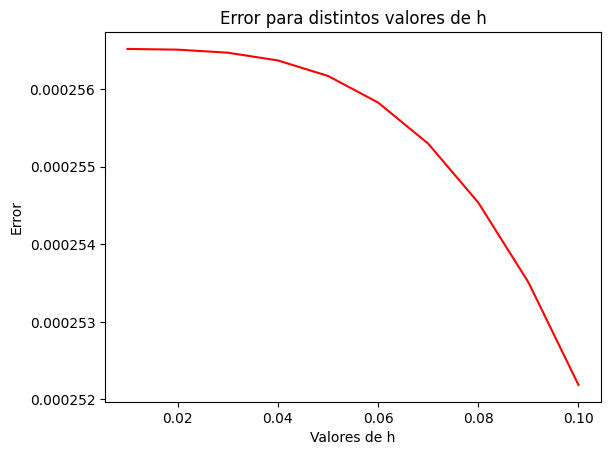

In [ ]:
#Con distintos valores de h
h_values = np.linspace(0.01, 0.1, 10)
errors = np.zeros(10)

for i in range(len(h_values)):
  d1 = five_point_derivate(f, x_, h_values[i])
  p1 = lagrange(x_,d1)

  d2 = five_point_derivate(p1, x_, h_values[i])
  p2 = lagrange(x_, d2)

  error_ = np.abs(p2(np.pi/8) - valor_real)
  errors[i] = error_

plt.plot(h_values, errors, color="red")
plt.xlabel("Valores de h")
plt.ylabel("Error")
plt.title("Error para distintos valores de h")

#El error disminuye para un h más grande

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
#a)
#Diferencias finitas
x2_ = np.linspace(1.8, 2.2, 6)
f2 = lambda x: x*np.exp(x)

def primera_derivada(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def segunda_derivada(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

print(f"La primera derivada evaluada en x=2 es {primera_derivada(f2, 1.8, 0.01)}")
print(f"La segunda derivada evaluada en x=2 es {segunda_derivada(f2, 2, 0.01)}")

La primera derivada evaluada en x=2 es 16.93949687558156
La segunda derivada evaluada en x=2 es 29.556593850124102


<ipython-input-5-16801a285dd5>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  df_real1 = derivative(f2, x2_, dx=1e-6, n=1)
<ipython-input-5-16801a285dd5>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  df_real2 = derivative(f2, x2_, dx=1e-6, n=2)


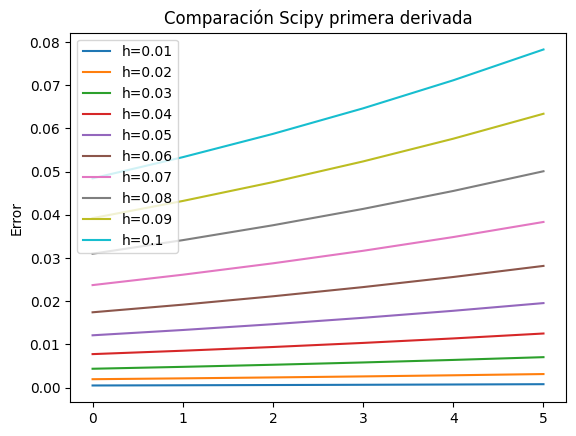

In [ ]:
#b)
#Comparación con scipy
df_real1 = derivative(f2, x2_, dx=1e-6, n=1)
df_real2 = derivative(f2, x2_, dx=1e-6, n=2)


for i in range(len(h_values)):
  df_1 = primera_derivada(f2, x2_, h_values[i])
  error1 = np.abs(df_real1 - df_1)

  plt.plot(error1, label=f"h={round(h_values[i],2)}")
  plt.ylabel("Error")
  plt.title("Comparación Scipy primera derivada")
  plt.legend()

  #El error parece disminuir para un h mas pequeño

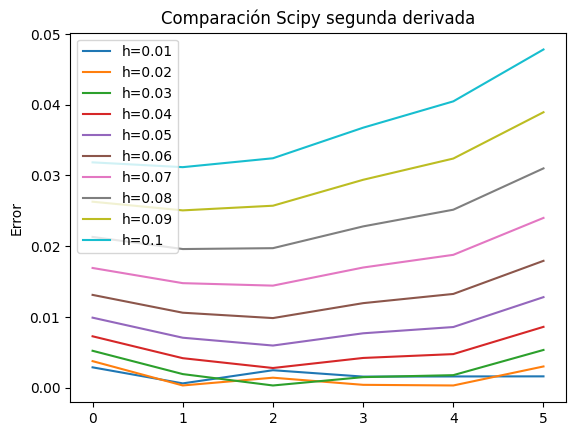

In [ ]:
for i in range(len(h_values)):
  df_2 = segunda_derivada(f2, x2_, h_values[i])
  error2 = np.abs(df_real2 - df_2)

  plt.plot(error2, label=f"h={round(h_values[i],2)}")
  plt.ylabel("Error")
  plt.title("Comparación Scipy segunda derivada")
  plt.legend()

  #Para h = 0.01, 0.02 y 0.03 el error parece ser más pequeño

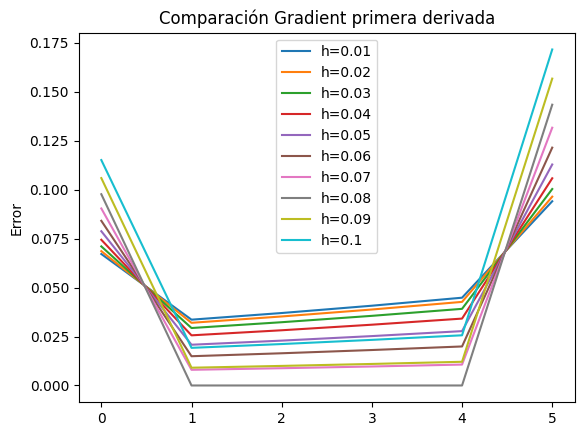

In [ ]:
#Comparación con gradient
df_realg1 = np.gradient(f2(x2_), x2_, edge_order=2)
df_realg2 = np.gradient(df_realg1, x2_, edge_order=2)

for i in range(len(h_values)):
  df_g1 = primera_derivada(f2, x2_, h_values[i])
  errorg1 = np.abs(df_realg1 - df_g1)

  plt.plot(errorg1, label=f"h={round(h_values[i],2)}")
  plt.ylabel("Error")
  plt.title("Comparación Gradient primera derivada")
  plt.legend()

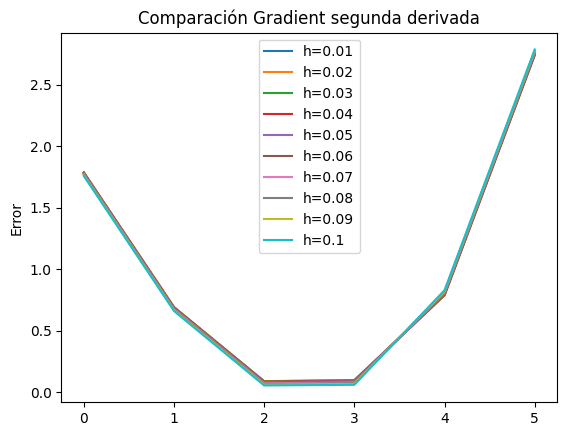

In [ ]:
for i in range(len(h_values)):
  df_g2 = segunda_derivada(f2, x2_, h_values[i])
  errorg2 = np.abs(df_realg2 - df_g2)

  plt.plot(errorg2, label=f"h={round(h_values[i],2)}")
  plt.ylabel("Error")
  plt.title("Comparación Gradient segunda derivada")
  plt.legend()

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [ ]:
h = 0.01


df_diferencias = primera_derivada(f2, 2, h)
df_tres_puntos = (f2(2+h) - f2(2-h))/(2*h)
df_cinco_puntos = (f2(2-2*h)-8*f2(2-h)+8*f2(2+h)-f2(2+2*h))/(12*h)

print(f"La derivada evaluada en x=2 con diferencias finitas es {df_diferencias}")
print(f"La derivada evaluada en x=2 con derivada de tres puntos es {df_tres_puntos}")
print(f"La derivada evaluada en x=2 con derivada de cinco puntos es {df_cinco_puntos}")

La derivada evaluada en x=2 con diferencias finitas es 22.167784055776885
La derivada evaluada en x=2 con derivada de tres puntos es 22.167784055776885
La derivada evaluada en x=2 con derivada de cinco puntos es 22.167168279550165
